# Import necessary and transformation

In [1]:
import pandas as pd
import numpy as np 
from prophet import Prophet
from sklearn.metrics import mean_squared_error

/Users/mymac/Documents/Data Science and AI/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("AirPassengers.csv")

In [9]:
df = df.rename(columns={'Passengers':'y','Month':'ds'})

In [10]:
df['y_orig'] = df['y']

In [11]:
df

,ds,y,y_orig
0,1949-01,112,112
1,1949-02,118,118
2,1949-03,132,132
3,1949-04,129,129
4,1949-05,121,121
...,...,...,...
139,1960-08,606,606
140,1960-09,508,508
141,1960-10,461,461
142,1960-11,390,390


In [12]:
df['y'] = np.log(df['y'])

In [13]:
df

,ds,y,y_orig
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121
...,...,...,...
139,1960-08,6.406880,606
140,1960-09,6.230481,508
141,1960-10,6.133398,461
142,1960-11,5.966147,390


# Buiding model

In this case, we don't need to split the data into train and test sample as we will use the whole dataset to predict out of sample data. You can still do the train test split to evaluate the model

In [14]:
model = Prophet()
model.fit(df)

15:10:27 - cmdstanpy - INFO - Chain [1] start processing
15:10:28 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_data = model.make_future_dataframe(periods=24,freq='M') # The periods you gave to the model can help it predict the new data in the next periods. In this case it is 24 months, which is 2 year

/Users/mymac/Documents/Data Science and AI/.venv/lib/python3.12/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [16]:
forecast_data = model.predict(future_data)

In [17]:
forecast_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
163,1962-07-31,6.380966,6.520376,6.664493,6.326292,6.436162,0.212206,0.212206,0.212206,0.212206,0.212206,0.212206,0.0,0.0,0.0,6.593172
164,1962-08-31,6.390130,6.406565,6.552966,6.329897,6.449276,0.086127,0.086127,0.086127,0.086127,0.086127,0.086127,0.0,0.0,0.0,6.476257
165,1962-09-30,6.398999,6.234426,6.392833,6.335700,6.462137,-0.088567,-0.088567,-0.088567,-0.088567,-0.088567,-0.088567,0.0,0.0,0.0,6.310432
166,1962-10-31,6.408163,6.095057,6.256971,6.339807,6.475930,-0.230982,-0.230982,-0.230982,-0.230982,-0.230982,-0.230982,0.0,0.0,0.0,6.177180
167,1962-11-30,6.417031,6.241797,6.411998,6.343660,6.489496,-0.093300,-0.093300,-0.093300,-0.093300,-0.093300,-0.093300,0.0,0.0,0.0,6.323731


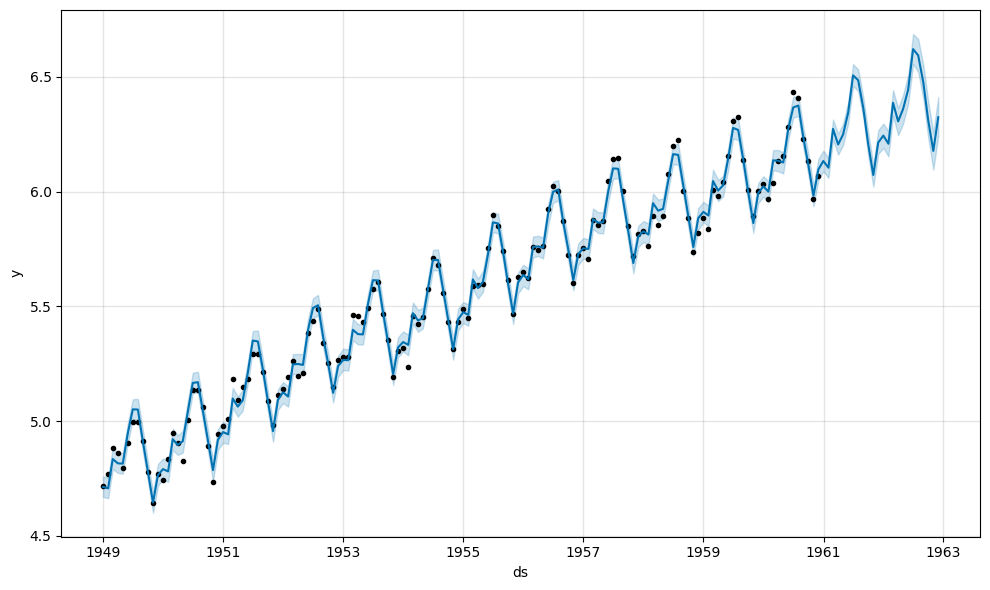

In [19]:
model.plot(forecast_data);

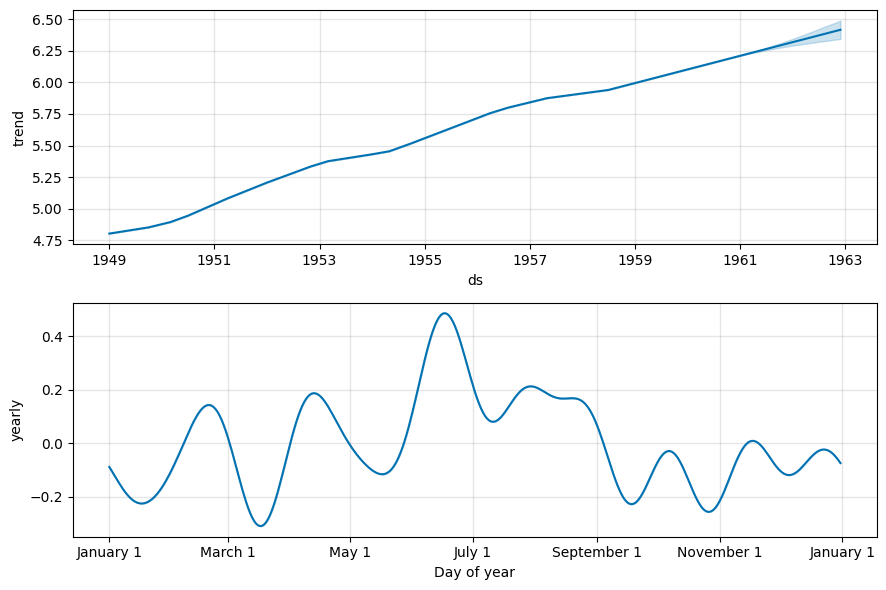

In [21]:
model.plot_components(forecast_data);

Convert the forecast_data back into its origin data

In [22]:
forecast_data_orig  = forecast_data

In [23]:
forecast_data_orig['yhat'] = np.exp(forecast_data['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data['yhat_upper'])

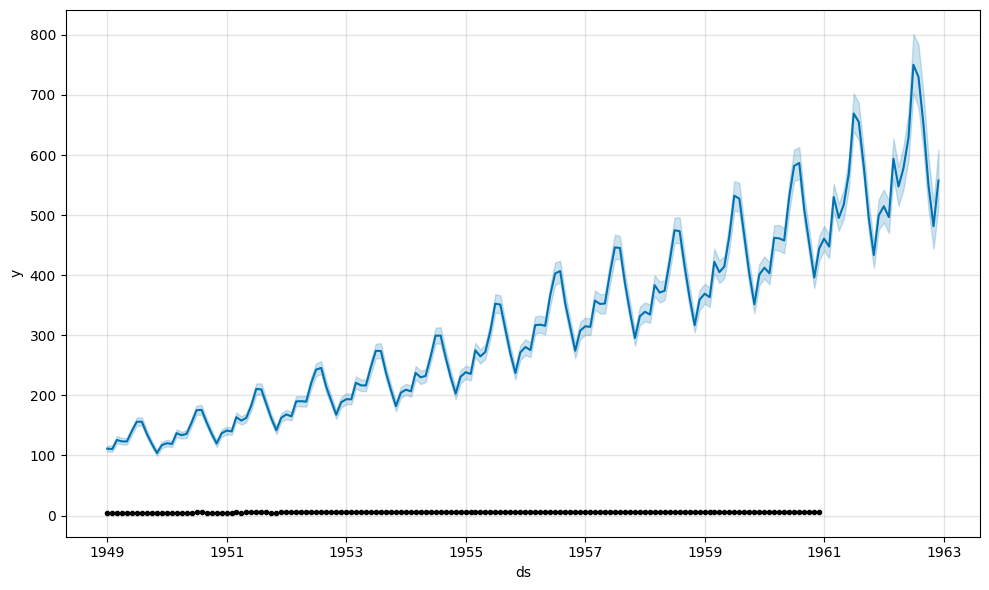

In [24]:
model.plot(forecast_data_orig);

# Adding the holiday features

In [25]:
model_1 = Prophet()

In [26]:
model_1.add_country_holidays(country_name='US')
model_1.fit(df)

15:26:42 - cmdstanpy - INFO - Chain [1] start processing
15:26:42 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future_data_1 = model_1.make_future_dataframe(periods=24,freq = 'M')

/Users/mymac/Documents/Data Science and AI/.venv/lib/python3.12/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [28]:
forecast_data_1 = model_1.predict(future_data_1)

In [29]:
forecast_data_1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Armistice Day,Armistice Day_lower,Armistice Day_upper,Armistice Day (observed),...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
163,1962-07-31,6.386524,6.518662,6.668179,6.324354,6.450208,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.207048,0.207048,0.207048,0.0,0.0,0.0,6.593572
164,1962-08-31,6.395647,6.394614,6.556499,6.327574,6.464343,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.077265,0.077265,0.077265,0.0,0.0,0.0,6.472912
165,1962-09-30,6.404477,6.230987,6.396932,6.331959,6.477670,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.092898,-0.092898,-0.092898,0.0,0.0,0.0,6.311579
166,1962-10-31,6.413600,6.085729,6.269243,6.337024,6.491820,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.236191,-0.236191,-0.236191,0.0,0.0,0.0,6.177410
167,1962-11-30,6.422430,6.230675,6.416362,6.339787,6.506800,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.099704,-0.099704,-0.099704,0.0,0.0,0.0,6.322725


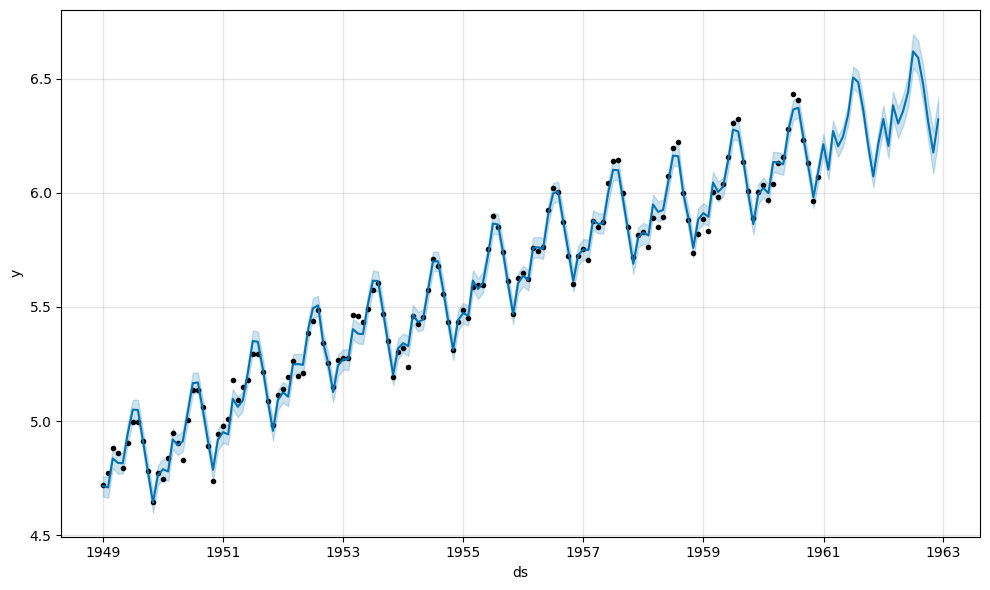

In [30]:
model_1.plot(forecast_data_1);

In [33]:
forecast_data_orig_1 = forecast_data_1
forecast_data_orig_1['yhat'] = np.exp(forecast_data_1['yhat'])
forecast_data_orig_1['yhat_lower'] = np.exp(forecast_data_1['yhat_lower'])
forecast_data_orig_1['yhat_upper'] = np.exp(forecast_data_1['yhat_upper'])

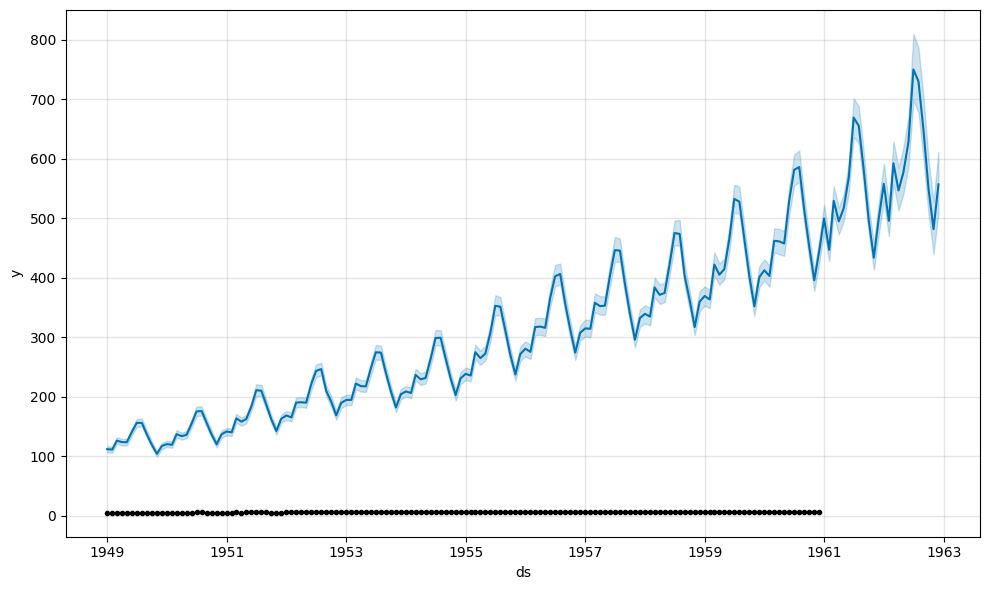

In [34]:
model_1.plot(forecast_data_orig_1);

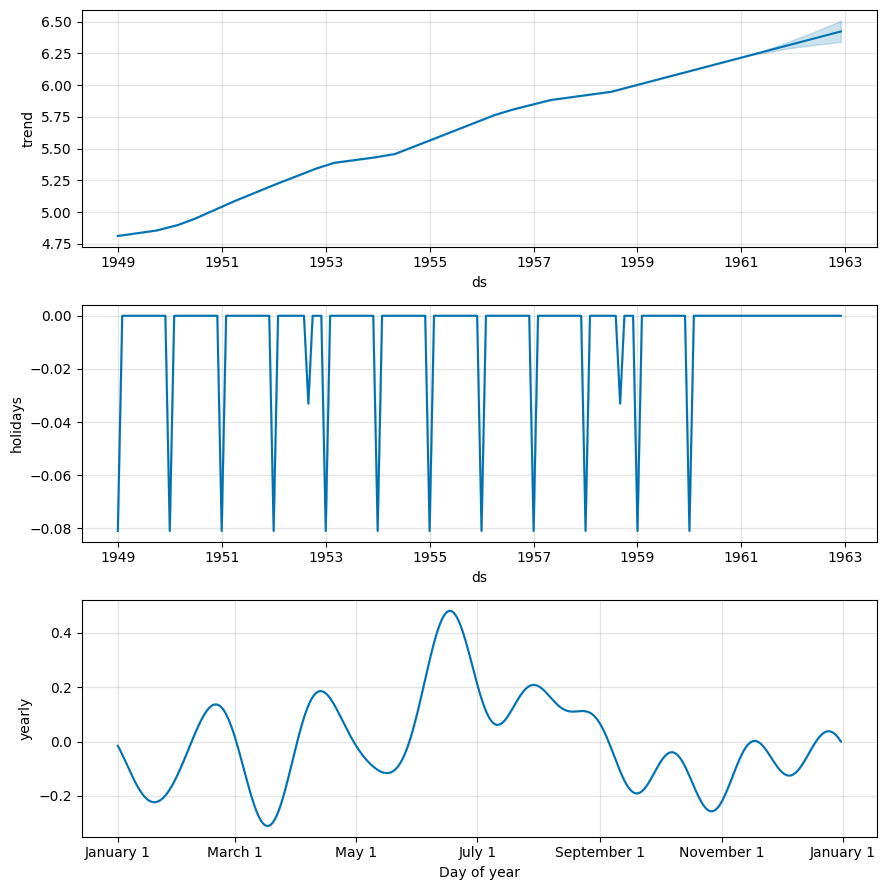

In [35]:
model_1.plot_components(forecast_data_orig_1);

# Multivariate analysis

In [36]:
train = pd.read_csv('DailyDelhiClimateTrain.csv')
test = pd.read_csv('DailyDelhiClimateTest.csv')
data = train
train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [37]:
len(test)

114

In [38]:
len(train)

1462

In [45]:
train = train.rename(columns = {'meantemp':'y', 'date': 'ds'})
train['y_orig'] = train['y']
train['y'] = np.log(train['y'])


In [50]:
model_new = Prophet()
model_new.add_regressor('humidity')
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')

In [51]:
model_new.fit(train)

16:03:07 - cmdstanpy - INFO - Chain [1] start processing
16:03:07 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
future_new_data = model_new.make_future_dataframe(periods=113,freq='D')

In [56]:
data = pd.concat([data, test], ignore_index=True)
data = data.rename(columns = {'meantemp':'y', 'date': 'ds'})
future_new_data = data[['ds','humidity','wind_speed','meanpressure']]

In [57]:
forecast_new_data = model_new.predict(future_new_data)

In [59]:
forecast_new_data['yhat']

0       0.857166
1       0.846352
2       0.853310
3       0.880902
4       0.859397
          ...   
1571    1.280080
1572    1.263909
1573    1.262181
1574    1.280714
1575    1.284745
Name: yhat, Length: 1576, dtype: float64

In [60]:
forecast_new_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,wind_speed,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,1.097026,0.817948,0.900893,1.097026,1.097026,-0.239860,-0.239860,-0.239860,-0.032667,...,0.002661,0.002661,0.002661,-0.208334,-0.208334,-0.208334,0.0,0.0,0.0,0.857166
1,2013-01-02,1.097451,0.806197,0.886489,1.097451,1.097451,-0.251099,-0.251099,-0.251099,-0.045000,...,0.001495,0.001495,0.001495,-0.207420,-0.207420,-0.207420,0.0,0.0,0.0,0.846352
2,2013-01-03,1.097877,0.810262,0.893490,1.097877,1.097877,-0.244566,-0.244566,-0.244566,-0.038207,...,0.000848,0.000848,0.000848,-0.205986,-0.205986,-0.205986,0.0,0.0,0.0,0.853310
3,2013-01-04,1.098302,0.841689,0.920350,1.098302,1.098302,-0.217400,-0.217400,-0.217400,-0.013557,...,0.002178,0.002178,0.002178,-0.204081,-0.204081,-0.204081,0.0,0.0,0.0,0.880902
4,2013-01-05,1.098727,0.821165,0.903013,1.098727,1.098727,-0.239330,-0.239330,-0.239330,-0.037589,...,0.001213,0.001213,0.001213,-0.201762,-0.201762,-0.201762,0.0,0.0,0.0,0.859397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2017-04-20,1.193891,1.240117,1.319441,1.188754,1.198975,0.086189,0.086189,0.086189,0.050036,...,0.000485,0.000485,0.000485,0.036526,0.036526,0.036526,0.0,0.0,0.0,1.280080
1572,2017-04-21,1.193958,1.222221,1.304906,1.188772,1.199095,0.069951,0.069951,0.069951,0.031811,...,-0.000063,-0.000063,-0.000063,0.037902,0.037902,0.037902,0.0,0.0,0.0,1.263909
1573,2017-04-22,1.194024,1.223412,1.304367,1.188788,1.199220,0.068157,0.068157,0.068157,0.028783,...,-0.000817,-0.000817,-0.000817,0.039353,0.039353,0.039353,0.0,0.0,0.0,1.262181
1574,2017-04-23,1.194091,1.242107,1.323264,1.188801,1.199348,0.086623,0.086623,0.086623,0.048306,...,-0.001236,-0.001236,-0.001236,0.040863,0.040863,0.040863,0.0,0.0,0.0,1.280714


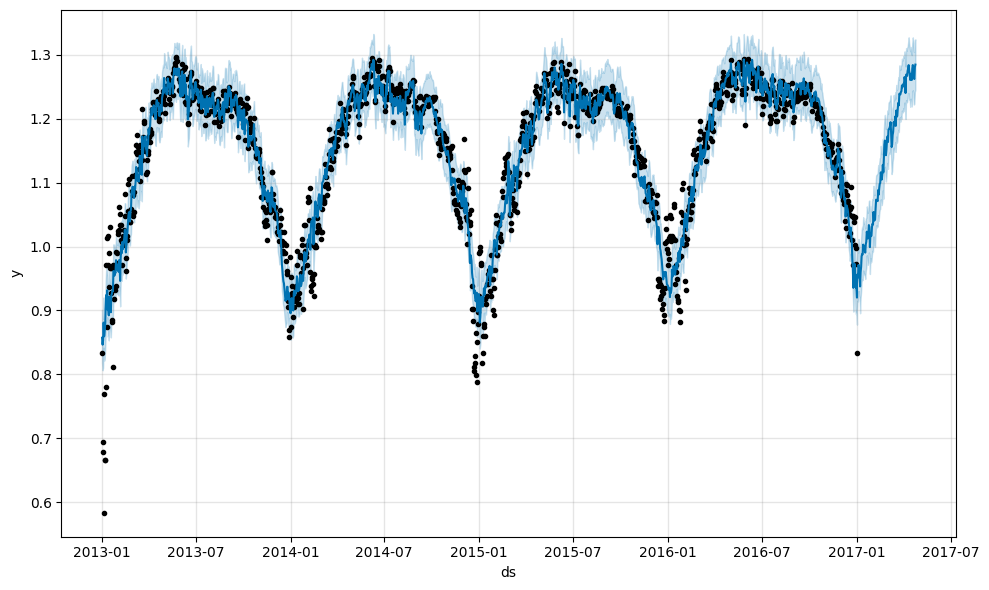

In [61]:
model_new.plot(forecast_new_data);

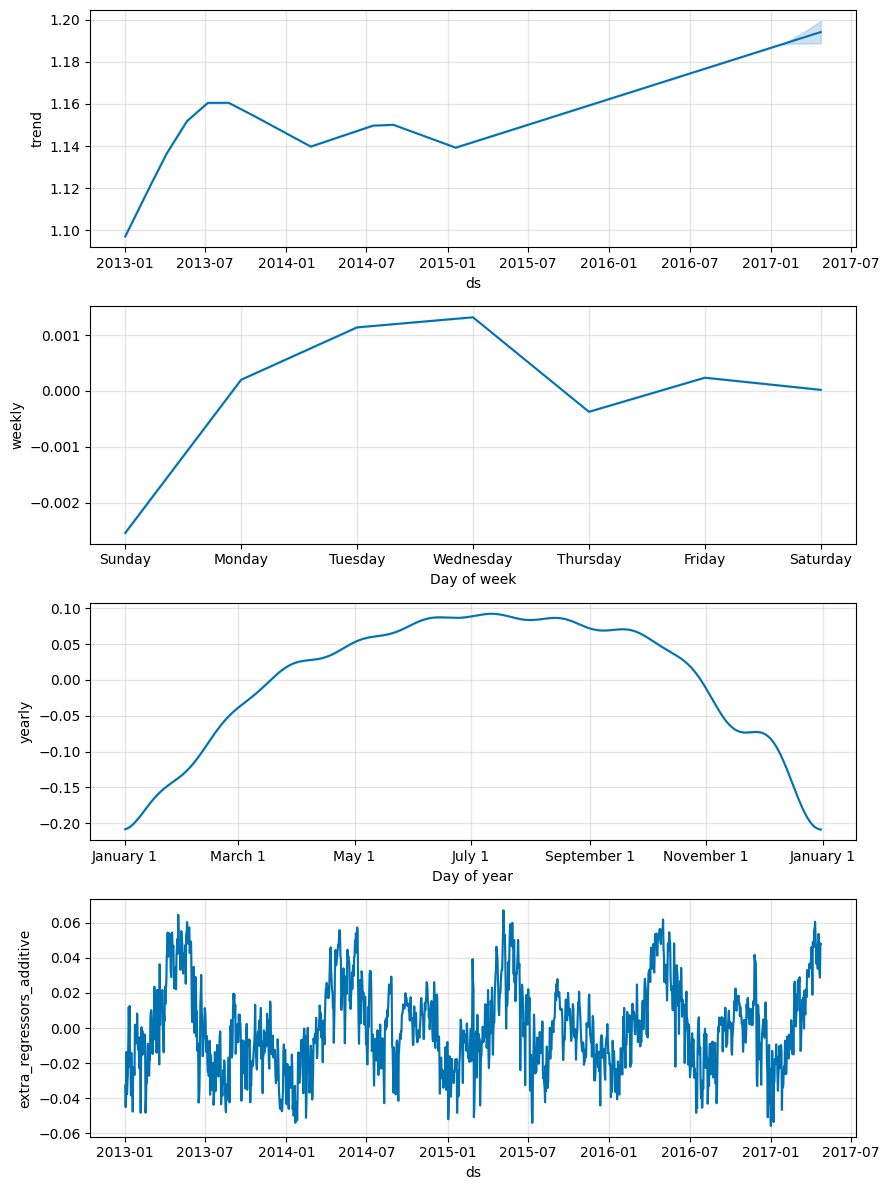

In [62]:
model_new.plot_components(forecast_new_data);

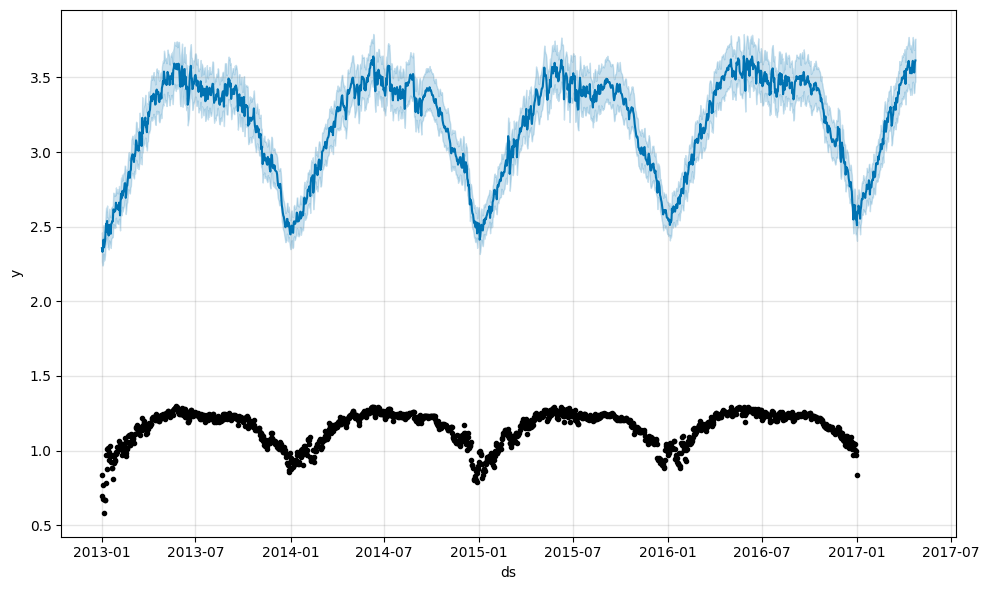

In [63]:
forecast_back = forecast_new_data
forecast_back['yhat'] = np.exp(forecast_new_data['yhat'])
forecast_back['yhat_lower'] = np.exp(forecast_new_data['yhat_lower'])
forecast_back['yhat_upper'] = np.exp(forecast_new_data['yhat_upper'])
model_new.plot(forecast_back);